In [1]:
import pandas as pd 
import torchaudio
from speechbrain.inference.speaker import EncoderClassifier
from scipy.io import wavfile
import noisereduce as nr
import os
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import sys
sys.path.append("../")


In [17]:
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")

rate, data = wavfile.read('../data/vox1/Adam_Beach/profile/Adam_Beach_file10.wav')
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
embeddings = classifier.encode_batch(torch.tensor(reduced_noise).float())
embeddings

tensor([[[-18.2876,  -7.6386,  18.3548,  40.4471, -35.4675,   5.6029,  -9.6877,
          -20.8389,   5.3712,   7.3724,  48.9398,  59.5445, -47.7416,  25.7873,
          -20.8526, -11.3711,  38.6276,  12.7239, -19.9233,  27.7044,   2.5122,
            4.8166,   8.8574,   2.9774,  63.7842,   1.0733,  26.8596,  22.4435,
           -6.0466, -35.5668,  22.3496,   8.4055,   1.7153, -16.2073,  27.5217,
           10.1756,  -4.9955,   2.5517,  -3.7164,  38.3708,  -4.0641,  14.5991,
           18.9953,  18.0138, -20.1490, -15.1673,   8.5229, -18.3598,  15.5708,
           -7.0086,  11.6343,  -5.9341,  23.0765, -14.8368,  46.3982, -18.6211,
          -49.7531,  -4.6916, -20.9156, -27.2470,  24.4172,  -5.8410,   3.6865,
           -6.7195,  24.2616,  18.2403, -11.3493,  12.1391, -25.9356, -30.6469,
            3.0144,  49.6771,   9.1450, -14.1888, -19.2692, -34.6549, -32.6705,
          -20.9549, -53.5481,  25.3022, -23.9460, -14.9228,  10.6933,  49.1316,
           24.7298,  -4.8787,  20.5285, 

In [4]:

from src.auth.utils import *
load_and_encode("../data/vox1/")

Jessica_De_Gouw
Steve_Carell
Laura_Dern
Ken_Jeong
Luc_Besson
Katy_Perry
Chiwetel_Ejiofor
Cilla_Black
Cory_Monteith
Vince_Gilligan
Josh_Radnor
Dawn_Wells
Michael_Weatherly
Peter_Jacobson
Leslie_Mann
Rhys_Ifans
Damian_Lewis
Scott_Bakula
Matt_Smith
Jonathan_Rhys_Meyers
Holliday_Grainger
Tim_Burton
Jonathan_Jackson
Jen_Lilley
Ajay_Devgn
Bobby_Cannavale
Jeremy_Piven
Jeremy_Clarkson
Nicole_Beharie
Cheryl_Ladd
Cher
Shay_Mitchell
Joanne_Froggatt
Tatyana_Ali
Raini_Rodriguez
Judith_Light
David_Morrissey
Stephen_Lang
Kendra_Wilkinson
Miranda_Hart
Sheryl_Lee_Ralph
Avan_Jogia
Jeremy_Shada
Alan_Alda
Aidan_Turner
Amitabh_Bachchan
Ryan_Ochoa
Sean_Kanan
Kylie_Minogue
Danica_McKellar
Sienna_Guillory
Miranda_Kerr
Jack_Griffo
Chris_Lowell
Dermot_Mulroney
Kristen_Schaal
Melody_Thomas_Scott
Jacob_Latimore
Hugh_Jackman
Paul_Feig
Janina_Gavankar
Jennifer_Esposito
Lea_Thompson
Keri_Russell
Andy_Samberg
Stan_Lee
Freida_Pinto
Tristan_Wilds
Dove_Cameron
Irina_Shayk
Adam_Beach
Sean_Maher
Sendhil_Ramamurthy
Michael

(array({'Jessica_De_Gouw': array([  8.960839  ,  34.26278   ,   8.952977  ,  10.304587  ,
         10.796296  ,  21.239857  ,  -8.099318  ,  -8.575031  ,
         25.86084   ,   4.512215  ,  13.139725  ,   0.6237057 ,
         12.488071  , -10.501468  ,   2.458493  ,  -0.6170414 ,
        -23.934378  ,  15.986818  ,   4.4332047 ,  18.280552  ,
         -5.5111    ,   1.3879105 ,   4.01173   , -27.498817  ,
          8.479777  ,   0.8279143 ,  25.131521  , -15.885809  ,
         -4.295904  , -30.409506  , -11.990885  , -20.262487  ,
         -2.5872557 , -22.42704   , -13.887098  ,  15.126244  ,
        -13.618023  , -14.405721  ,  -1.2909517 ,  34.087776  ,
        -11.183     ,  -7.510588  , -33.961407  ,  -1.1239167 ,
         -8.421838  ,  -1.4804008 ,   6.985116  ,  -1.7102767 ,
         -5.514485  ,  -1.3384327 ,  10.044154  ,  22.098948  ,
        -20.845837  , -11.245604  ,  -2.2254636 , -30.407867  ,
         18.124998  ,  -8.294524  , -12.547327  , -13.719459  ,
         15.67

In [58]:
os.getcwd()

'/Users/martynagrygiel/Documents/studia/sem3/biometria/projekt2/Biometrics-Lab-Behavioral-Based-Auth/notebooks'

In [40]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json

def load_and_encode(directory):
    embeddings = {}
    labels = []
    for person in os.listdir(directory):
        person_dir = os.path.join(directory, person, "profile")
        embs_profile = []
        print(person)
        for filename in os.listdir(person_dir):
            if filename.endswith('.wav'):
                filepath = os.path.join(person_dir, filename)
                rate, data = wavfile.read(filepath)
                reduced_noise = nr.reduce_noise(y=data, sr=rate)
                emb = classifier.encode_batch(torch.tensor(reduced_noise).float())
                embs_profile.append(emb.squeeze().detach().numpy()) 
                labels.append(person)
        embeddings[person]=np.mean(embs_profile, axis=0)
        print(type(embeddings[person]))
        data_for_df = [{'user_name': key, 'embedding': json.dumps(value.tolist())} for key, value in embeddings.items()]
        df = pd.DataFrame(data_for_df)
        df.to_csv('users_all.csv', index=False)    
    return np.array(embeddings), labels
load_and_encode("../data/vox1/")


Jessica_De_Gouw
<class 'numpy.ndarray'>
Steve_Carell
<class 'numpy.ndarray'>
Laura_Dern


KeyboardInterrupt: 

In [53]:

from scipy.spatial.distance import cosine
df = pd.read_csv("users_all.csv")
embedding_dict = dict(zip(df['user_name'], df['embedding'].apply(lambda x: np.array(json.loads(x), dtype=np.float32))))

user_names = list(embedding_dict.keys())


def authenticate(audio_path: str, threshold=0.6):
    """User authentication based on cosine similarity.

    Args:
        audio_path (str): string path to the audio file
        threshold (float, optional): Threshold thad defines the minimum cosine similarity value that should be reached to identify user. Defaults to 0.6.

    Returns:
        str| None: closest user or None if none of users is close enough
    """
    rate, data = wavfile.read(audio_path)
    reduced_noise = nr.reduce_noise(y=data, sr=rate)
    emb = classifier.encode_batch(torch.tensor(reduced_noise).float()).reshape(-1, 1).view(-1)
    closest_user = None
    min_distance = -1
    
    for user_name, stored_embedding in embedding_dict.items():
        similarity = 1 - cosine(emb, stored_embedding)
        if similarity > min_distance:
            min_distance = similarity
            closest_user = user_name
    if min_distance >= threshold:
        return closest_user
    else:
        return None

# Example usage
closest_user = authenticate('../data/vox1/Jessica_De_Gouw/test_positive/Jessica_De_Gouw_file1.wav')
closest_user

'Jessica_De_Gouw'

In [3]:
identify('../data/vox1/Jessica_De_Gouw/test_positive/Jessica_De_Gouw_file1.wav', "Jessica De Gouw")

True

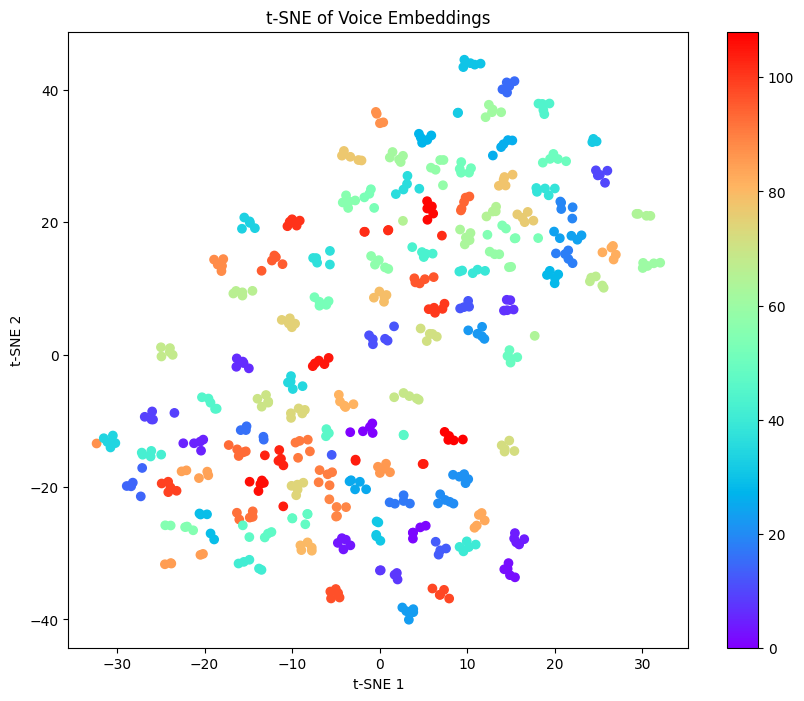

In [20]:
def load_and_encode_1(directory):
    embeddings = []
    labels = []
    for person in os.listdir(directory):
        person_dir = os.path.join(directory, person, "profile")
        i = 0
        for filename in os.listdir(person_dir):
            if i >= 5:  # Limit to 100 embeddings for faster processing
                break
            if filename.endswith('.wav'):
                filepath = os.path.join(person_dir, filename)
                rate, data = wavfile.read(filepath)
                # perform noise reduction
                reduced_noise = nr.reduce_noise(y=data, sr=rate)
                emb = classifier.encode_batch(torch.tensor(reduced_noise).float())
                embeddings.append(emb.squeeze().detach().numpy())  # Ensure it's a numpy array
                labels.append(person)
                i +=1

    
    return np.array(embeddings), labels

# Load data and encode
data_dir = "../data/vox1"
embeddings, labels = load_and_encode_1(data_dir)

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
transformed_embeddings = tsne.fit_transform(embeddings)
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], cmap='rainbow', c=numeric_labels, label=labels)
plt.colorbar(scatter)
plt.title('t-SNE of Voice Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

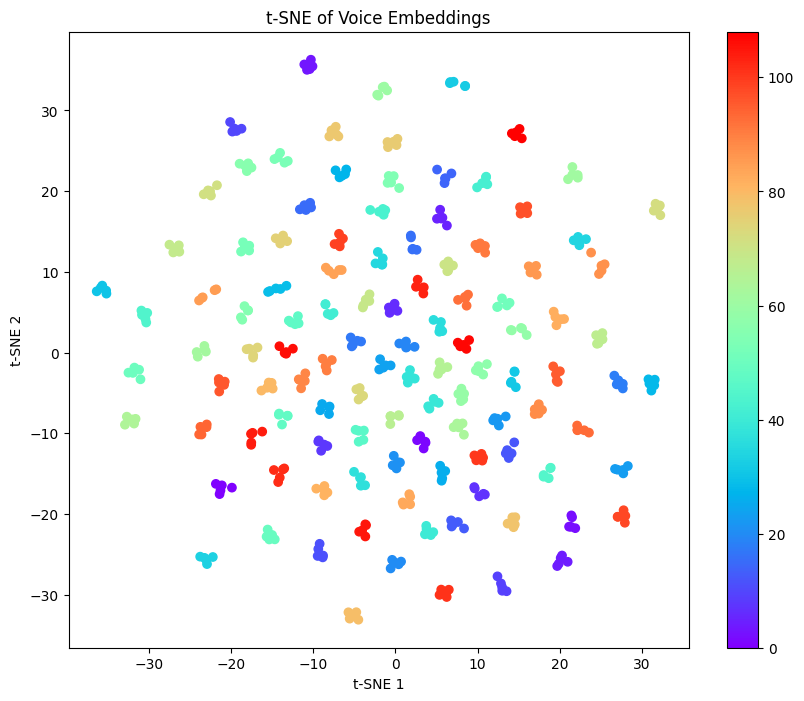

In [22]:
def load_and_encode_1(directory):
    embeddings = []
    labels = []
    for person in os.listdir(directory):
        person_dir = os.path.join(directory, person, "profile")
        i = 0
        for filename in os.listdir(person_dir):
            if i >= 5:  # Limit to 100 embeddings for faster processing
                break
            if filename.endswith('.wav'):
                filepath = os.path.join(person_dir, filename)
                rate, data = wavfile.read(filepath)
                # perform noise reduction
                emb = classifier.encode_batch(torch.tensor(data).float())
                embeddings.append(emb.squeeze().detach().numpy())  # Ensure it's a numpy array
                labels.append(person)
                i +=1

    
    return np.array(embeddings), labels

# Load data and encode
data_dir = "../data/vox1"
embeddings, labels = load_and_encode_1(data_dir)

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
transformed_embeddings = tsne.fit_transform(embeddings)
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(transformed_embeddings[:, 0], transformed_embeddings[:, 1], cmap='rainbow', c=numeric_labels, label=labels)
plt.colorbar(scatter)
plt.title('t-SNE of Voice Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()